In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Reading the Dataset

In [36]:
df = pd.read_csv("dataset.csv")
df

,text,label,source,fold
0,There are alot reasons to keep our the despise...,0,persuade_corpus,2
1,Driving smart cars that drive by themself has ...,0,persuade_corpus,4
2,"Dear Principal,\n\nI believe that students at ...",0,persuade_corpus,0
3,"Dear Principal,\n\nCommunity service should no...",0,persuade_corpus,0
4,My argument for the development of the driverl...,0,persuade_corpus,3
...,...,...,...,...
33254,Are driverless cars really necessary? Most of ...,0,persuade_corpus,4
33255,"""Oh man I didn't make the soccer team!"", yelle...",0,persuade_corpus,1
33256,I believe that using this technology could be ...,0,persuade_corpus,0
33257,Texting & Driving\n\nUsing your phone while dr...,0,persuade_corpus,3


### Dropping Columns which are not required for classifying

In [3]:
df.drop(columns=['source', 'fold'], inplace=True)
df

,text,label
0,There are alot reasons to keep our the despise...,0
1,Driving smart cars that drive by themself has ...,0
2,"Dear Principal,\n\nI believe that students at ...",0
3,"Dear Principal,\n\nCommunity service should no...",0
4,My argument for the development of the driverl...,0
...,...,...
33254,Are driverless cars really necessary? Most of ...,0
33255,"""Oh man I didn't make the soccer team!"", yelle...",0
33256,I believe that using this technology could be ...,0
33257,Texting & Driving\n\nUsing your phone while dr...,0


In [14]:
new_df1 = df[df['label'] == 0][:10000]

In [15]:
frames = [new_df1, df[df['label'] == 1]]
final_df1 = pd.concat(frames)

print(final_df1[final_df1['label'] == 0].shape)
print(final_df1[final_df1['label'] == 1].shape)

(10000, 2)
(7263, 2)


<Axes: xlabel='label', ylabel='count'>

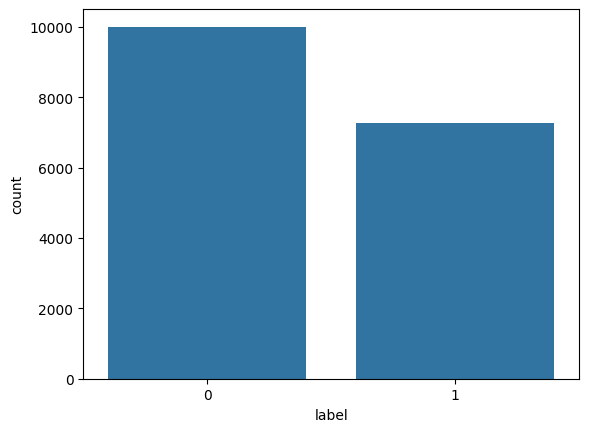

In [16]:
sns.countplot(final_df1,x="label")

In [8]:
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
final_df1.reset_index(drop=True, inplace=True)
final_df1

,text,label
0,There are alot reasons to keep our the despise...,0
1,Driving smart cars that drive by themself has ...,0
2,"Dear Principal,\n\nI believe that students at ...",0
3,"Dear Principal,\n\nCommunity service should no...",0
4,My argument for the development of the driverl...,0
...,...,...
17258,Despite some students' enthusiasm for a three-...,1
17259,Working in a group is way better than working ...,1
17260,The implementation of a four-day school week w...,1
17261,Thomas Jefferson was a prominent American stat...,1


## Text Processing :

The below section tokenizes, lowercases, removes non-alphabetic characters, removes stopwords, and lemmatizes each text document in the DataFrame final_df1, and stores the preprocessed text in the list corpus.

In [18]:
import re
from nltk.corpus import stopwords
nltk.download('wordnet')
corpus = []
wl = WordNetLemmatizer()
for i in range(0, len(final_df1)):
  review = re.sub('[^a-zA-Z]', ' ', final_df1['text'][i])
  review = review.lower()
  review = review.split()

  review = [wl.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
corpus

['alot reason keep despised method choosing president first reason certainty outcome text state reason winning candidate share electoral college invariably exceeds share popular vote another example text obama recieved percent electoral vote compared percent popular vote cast romney state award electoral vote winner take basis another reason electiral college requires presidential candidate trans regional appeal case region enough electoral vote elect president solid regional favorite romney south reason campaign state poor economy wealthy state wont able campaign heavily left vote would find electoral college vote suitable area text state desriable result candidate regional appeal unlikely successful president also electoral college restores weight political balance large state population lose virtue mal apportionment senate decreed constitution proof text popular vote close florida nevertheless obama vote got electoral vote victory margin wynoming would net winner electoral vote thin

### The below segment is utilizing the CountVectorizer class from scikit-learn to convert a collection of text documents into a matrix of token counts.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()

In [21]:
y = final_df1['label']
X

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])


# Imbalanced Learning Technique #1

This workflow ensures that the imbalanced dataset is appropriately handled by oversampling the minority class using SMOTE(Synthetic Minority Over-sampling Technique) algorithm and then splitting the data into training and testing subsets for model evaluation.

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42, k_neighbors = 5)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [23]:
y_res.value_counts()

label
0    10000
1    10000
Name: count, dtype: int64

## This segment demonstrates the use of a Multinomial Naive Bayes classifier from scikit-learn to build a AI detection model

In [38]:
from sklearn.naive_bayes import MultinomialNB
detect_model = MultinomialNB().fit(X_train, y_train)
y_pred = detect_model.predict(X_test)


### In the below segments , we can see evaluation metrics being done for the model.We are also plotting various graphs such as the confusion matrix, ROC curve anf the Precision-recall curve

In [39]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)

In [40]:
from sklearn.metrics import accuracy_score, recall_score
accuracy = accuracy_score(y_test, y_pred)

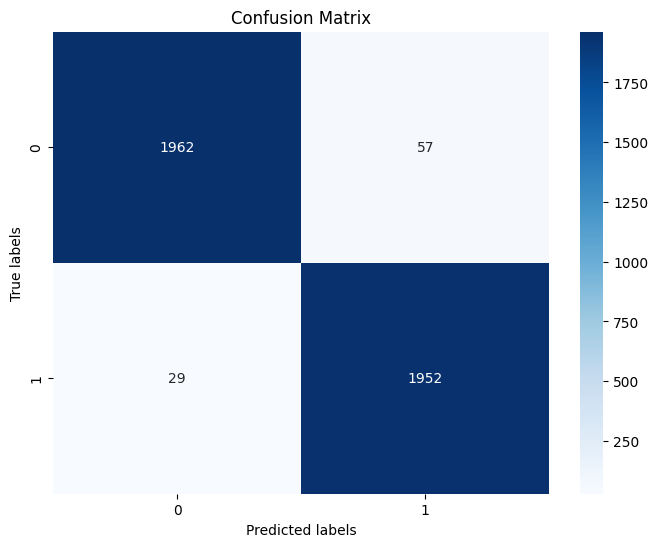

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [42]:
print("Accuracy =",accuracy)

Accuracy = 0.9785


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2019
           1       0.97      0.99      0.98      1981

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



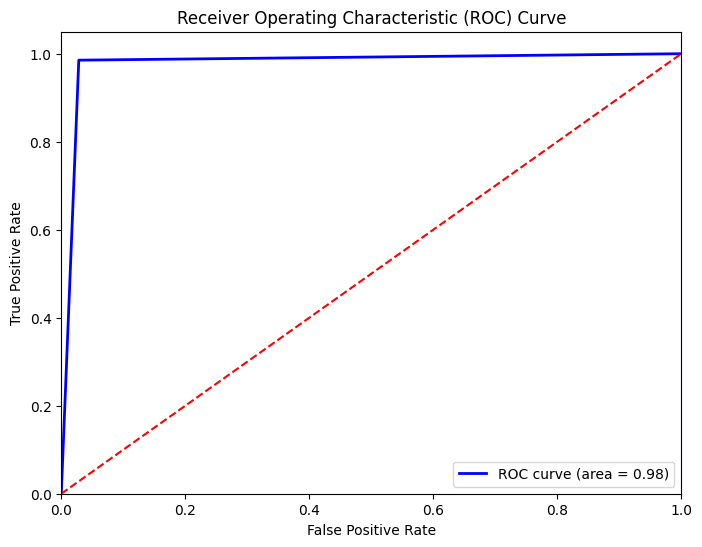

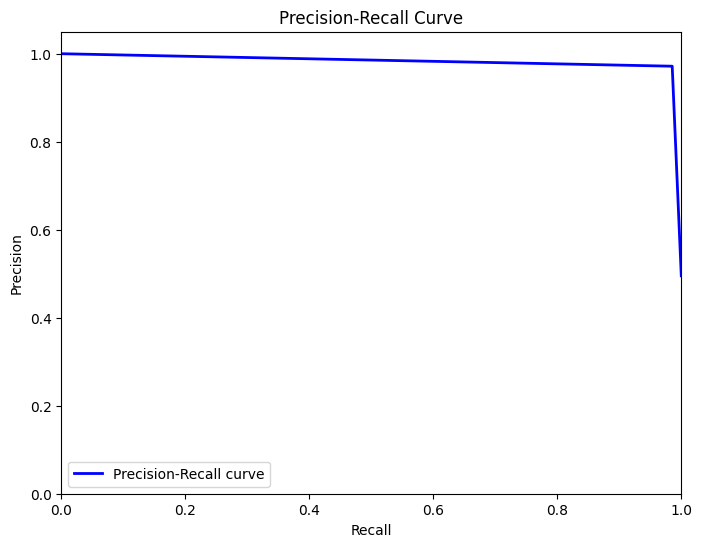

In [44]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc


# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute Precision-Recall curve and area
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()



# Imbalanced Learning Technique #2

This workflow ensures that the imbalanced dataset is properly handled by undersampling the majority class, resulting in a more balanced dataset for training your model.This is done using Random Under Sampler.








In [51]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)


X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [52]:
y_resampled.value_counts()

label
0    7263
1    7263
Name: count, dtype: int64

### Similar pipline is followed after under sampling where model is trained , metrics is performed on the model, then graphs are plotted for the same

In [54]:
detect_model1 = MultinomialNB().fit(X_train1, y_train1)
y_pred1 = detect_model1.predict(X_test1)


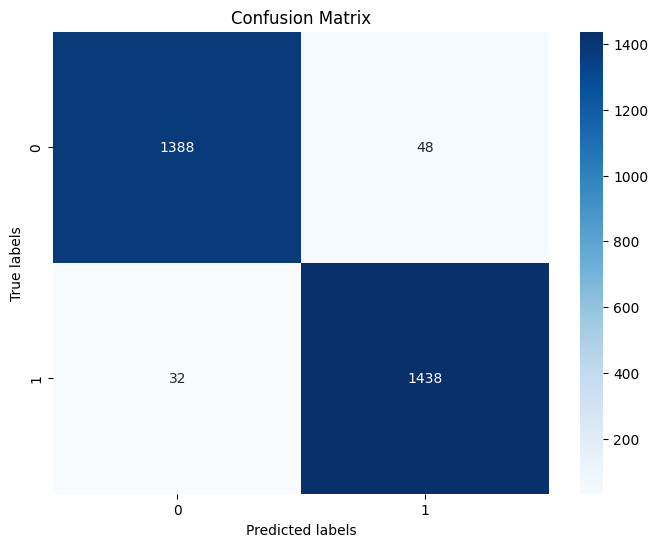

In [55]:
from sklearn.metrics import confusion_matrix
confusion_m1 = confusion_matrix(y_test1, y_pred1)
from sklearn.metrics import accuracy_score, recall_score
accuracy1 = accuracy_score(y_test1, y_pred1)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m1, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [56]:
print("Accuracy =",accuracy1)
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

Accuracy = 0.9724707501720579
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1436
           1       0.97      0.98      0.97      1470

    accuracy                           0.97      2906
   macro avg       0.97      0.97      0.97      2906
weighted avg       0.97      0.97      0.97      2906



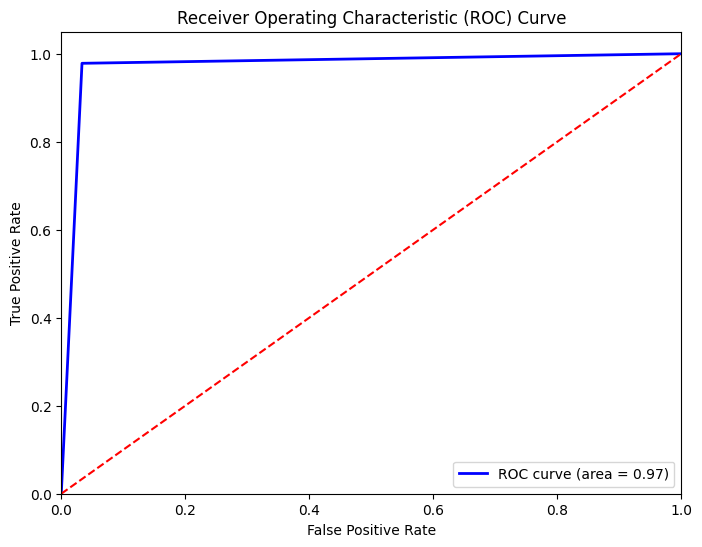

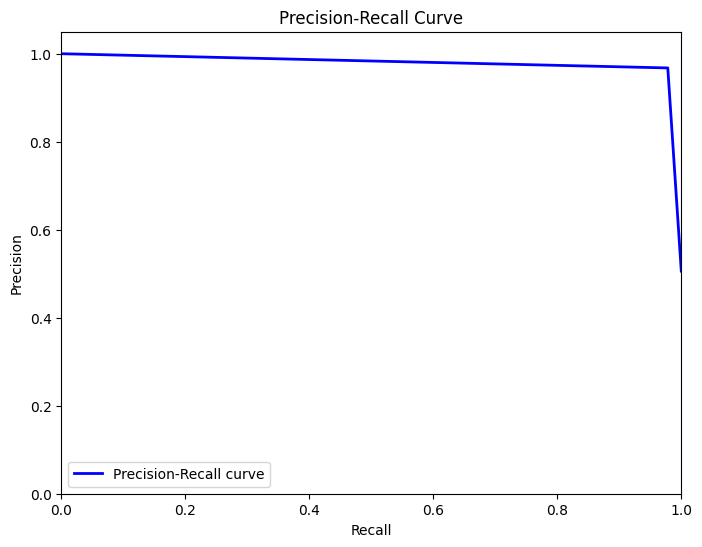

In [57]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc


# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test1, y_pred1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute Precision-Recall curve and area
precision, recall, _ = precision_recall_curve(y_test1, y_pred1)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


### Below we are Testing our models with various AI and Non AI texts

TEST CASE #1 for Model-1

In [46]:

test_text = "You can use various visualization libraries in Python to plot a confusion matrix. One common library for this task is Matplotlib. Here's how you can plot a confusion matrix using Matplotlib:"

review = re.sub('[^a-zA-Z]', ' ', test_text)
review = review.lower()
review = review.split()
review = [wl.lemmatize(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)


test_text_vectorized = cv.transform([review])


prediction = detect_model.predict(test_text_vectorized)


print("Predicted label:", prediction)


Predicted label: [1]


TEST CASE #2 for Model-1

In [59]:

test_text = "Hello , welcome to my blog page.Here I will dicuss about technology and sports"

review = re.sub('[^a-zA-Z]', ' ', test_text)
review = review.lower()
review = review.split()
review = [wl.lemmatize(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)


test_text_vectorized = cv.transform([review])


prediction = detect_model.predict(test_text_vectorized)


print("Predicted label:", prediction)


Predicted label: [0]


TEST CASE #1 for Model-2

In [60]:

test_text = "You can use various visualization libraries in Python to plot a confusion matrix. One common library for this task is Matplotlib. Here's how you can plot a confusion matrix using Matplotlib:"

review = re.sub('[^a-zA-Z]', ' ', test_text)
review = review.lower()
review = review.split()
review = [wl.lemmatize(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)


test_text_vectorized = cv.transform([review])


prediction = detect_model1.predict(test_text_vectorized)


print("Predicted label:", prediction)


Predicted label: [1]


TEST CASE #2 for Model-2

In [61]:

test_text = "Hello , welcome to my blog page.Here I will dicuss about technology and sports"

review = re.sub('[^a-zA-Z]', ' ', test_text)
review = review.lower()
review = review.split()
review = [wl.lemmatize(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)


test_text_vectorized = cv.transform([review])


prediction = detect_model1.predict(test_text_vectorized)


print("Predicted label:", prediction)


Predicted label: [0]


## Inference


1. **Data Preprocessing Techniques:**
   - Model 1 was trained on data that underwent Synthetic Minority Over-sampling Technique (SMOTE).
   - Model 2 was trained on data that underwent undersampling.

2. **Model Performance:**
   - Model 1 achieved an accuracy of 97.85%, with precision, recall, and F1-score for class 0 being 0.99, 0.97, and 0.98 respectively, and for class 1 being 0.97, 0.99, and 0.98 respectively.
   - Model 2 achieved an accuracy of 97.25%, with precision, recall, and F1-score for class 0 being 0.98, 0.97, and 0.97 respectively, and for class 1 being 0.97, 0.98, and 0.97 respectively.

3. **Comparison:**
   - Both models perform quite well with high accuracy, precision, recall, and F1-scores.
   - Model 1, trained on SMOTE data, shows slightly better performance metrics compared to Model 2 trained on undersampled data.

4. **Recommendation:**
   - Model 1 might be preferred for scenarios where balanced performance across both classes is crucial.
   - Model 2 could be sufficient if computational efficiency or resource constraints are significant factors, as undersampling reduces the size of the dataset.


Overall, both models demonstrate effective classification performance, with Model 1 potentially offering a slight edge due to its use of SMOTE for handling class imbalance.